#  Practical Data Preprocessing Task – Sales Dataset

##  Task Title:
**"Will This Sale Be Successful?"**

##  Objective:
You are provided with a real-world retail dataset. Your task is to **prepare the data for a machine learning classification model** that predicts whether a customer will purchase **more than 3 items in a single transaction**.

You will perform a complete preprocessing pipeline from data exploration to handling imbalances, with visualizations and clear justifications for each step.

---

##  Dataset Description:

Dataset link: [Customer Shopping Dataset – Retail Sales Data](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset)

The dataset contains sales transactions from a retail environment with the following columns:

| Column Name       | Description                                                              |
|------------------|---------------------------------------------------------------------------|
| `invoice_no`      | Unique identifier for the invoice                                         |
| `customer_id`     | Unique identifier for each customer                                       |
| `gender`          | Gender of the customer (`Male`, `Female`)                                |
| `age`             | Age of the customer                                                      |
| `category`        | Category of the purchased product                                        |
| `quantity`        | Number of items purchased in the transaction                            |
| `price`           | Unit price of the product in Turkish Lira                                |
| `payment_method`  | Payment method used (e.g., `Cash`, `Credit Card`, `Debit Card`)         |
| `invoice_date`    | Date of the transaction                                                  |
| `shopping_mall`   | Name of the mall where the transaction occurred                         |

---

##  Task Instructions:

You must complete the following steps **in order**, and write clear explanations (in Markdown cells) alongside your code in a Jupyter Notebook.

### 1. Load & Explore the Data
- Load the dataset.
- Display first few rows and general information.
- Summary statistics of numerical and categorical features.
- Visualizations:
  - Histogram of `age`, `price`, and `quantity`.
  - Countplot for `gender`, `category`, and `payment_method`.

---

### 2. Clean the Data
- Remove duplicate records if any.
- Identify and remove/fix unrealistic values (e.g., negative or 0 prices, age outliers).
- Provide a rationale for cleaning decisions.

---

### 3. Handle Missing Data
- Check for missing values.
- Apply at least two different strategies to handle missing data:
  - Drop
  - Fill (e.g., with median, mode, etc.)
- Justify why each method was chosen.

---

### 4. Feature Engineering
- Create a new column: `total_spent = quantity * price`
- Create a new binary target column:
  - 1 if `quantity > 3`, otherwise 0
  - Name the new column `target`

---

### 5. Encode Categorical Variables
- Encode all applicable categorical features using suitable encoding techniques.
- Explain your choice (e.g., Label Encoding vs OneHot Encoding).

---

### 6. Detect & Handle Outliers
- Use visualizations (e.g., boxplots) to detect outliers in numerical columns like `age`, `price`, and `total_spent`.
- Apply IQR or another statistical method to handle outliers.

---

### 7. Feature Scaling
- Apply feature scaling to numerical columns like `age`, `price`, and `total_spent`.
- Use either `StandardScaler` or `MinMaxScaler`.
- Show distributions before and after scaling.

---

### 8. Train-Test Split
- Split the data into training and testing sets (80/20).
- Use `stratify=y` to preserve class distribution.

---

### 9. Deal with Imbalanced Classes
- Check class distribution of your `target` variable.
- If imbalanced, apply resampling techniques:
  - Random UnderSampling or SMOTE
- Show class distribution before and after resampling.

---
    
## Deliverables:
At the end of the session, you should submit:
- A complete Jupyter Notebook with:
  - Well-structured code
  - Clear explanations using Markdown
  - Visualizations embedded
- A short reflection answering:
  - What challenges did you face?
  - What did you learn from this task?
  - What would you do differently if the dataset was larger/messier?

---

## Hints:
- Clean code is important! Keep your notebook readable.
- Justify your preprocessing decisions.
- Label your visualizations properly.

---

> **Good luck! This is your chance to practice real-world data preparation and analysis.**


------------

------------

## 1. Load & Explore the Data

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset (replace with your actual file path)
df = pd.read_csv("customer_shopping_data.csv")

# Display first few rows
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [7]:
# Summary statistics of numerical features
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [9]:
# Summary statistics of categorical features
df.describe(include=['object'])

,invoice_no,customer_id,gender,category,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457,99457,99457,99457
unique,99457,99457,2,8,3,797,10
top,I138884,C241288,Female,Clothing,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,34487,44447,159,19943


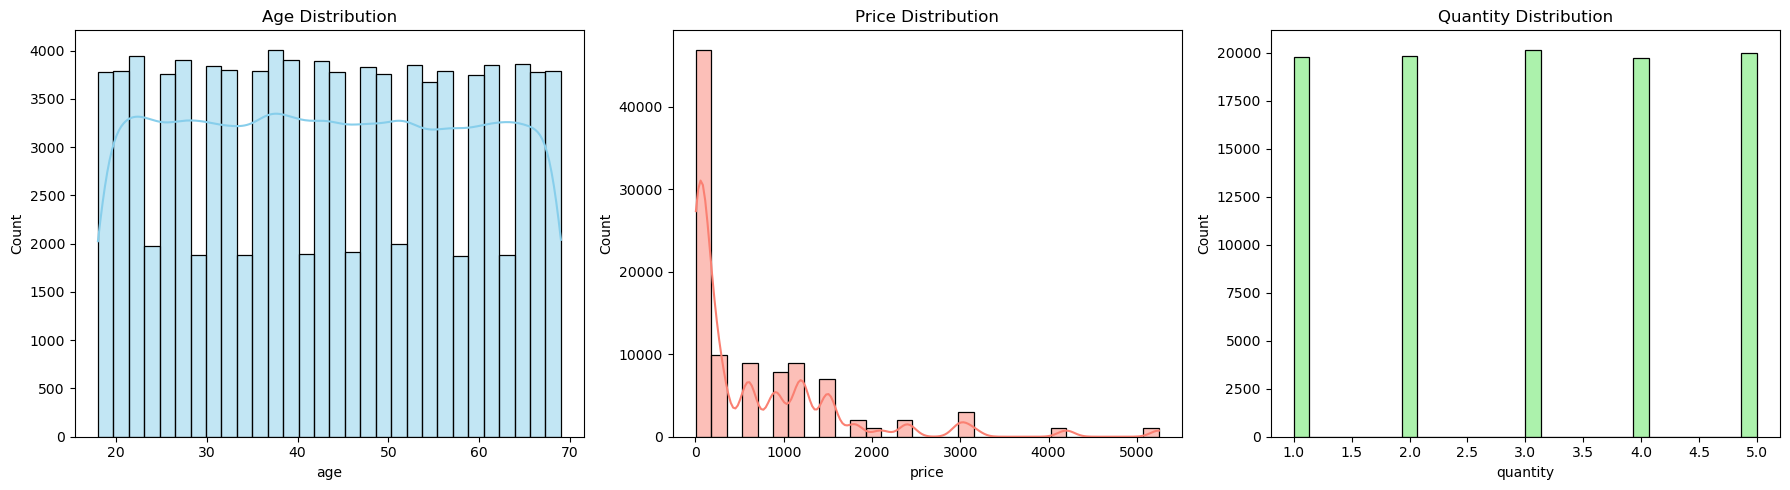

In [11]:
# Histograms for numerical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['age'], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Age Distribution")

sns.histplot(df['price'], bins=30, kde=True, ax=axes[1], color="salmon")
axes[1].set_title("Price Distribution")

sns.histplot(df['quantity'], bins=30, kde=False, ax=axes[2], color="lightgreen")
axes[2].set_title("Quantity Distribution")

plt.tight_layout()
plt.show()

C:\Users\hadys\AppData\Local\Temp\ipykernel_18204\3203954092.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', ax=axes[0], palette="pastel")
C:\Users\hadys\AppData\Local\Temp\ipykernel_18204\3203954092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', ax=axes[1], palette="pastel")
C:\Users\hadys\AppData\Local\Temp\ipykernel_18204\3203954092.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='payment_method', ax=axes[2], palette="pastel")


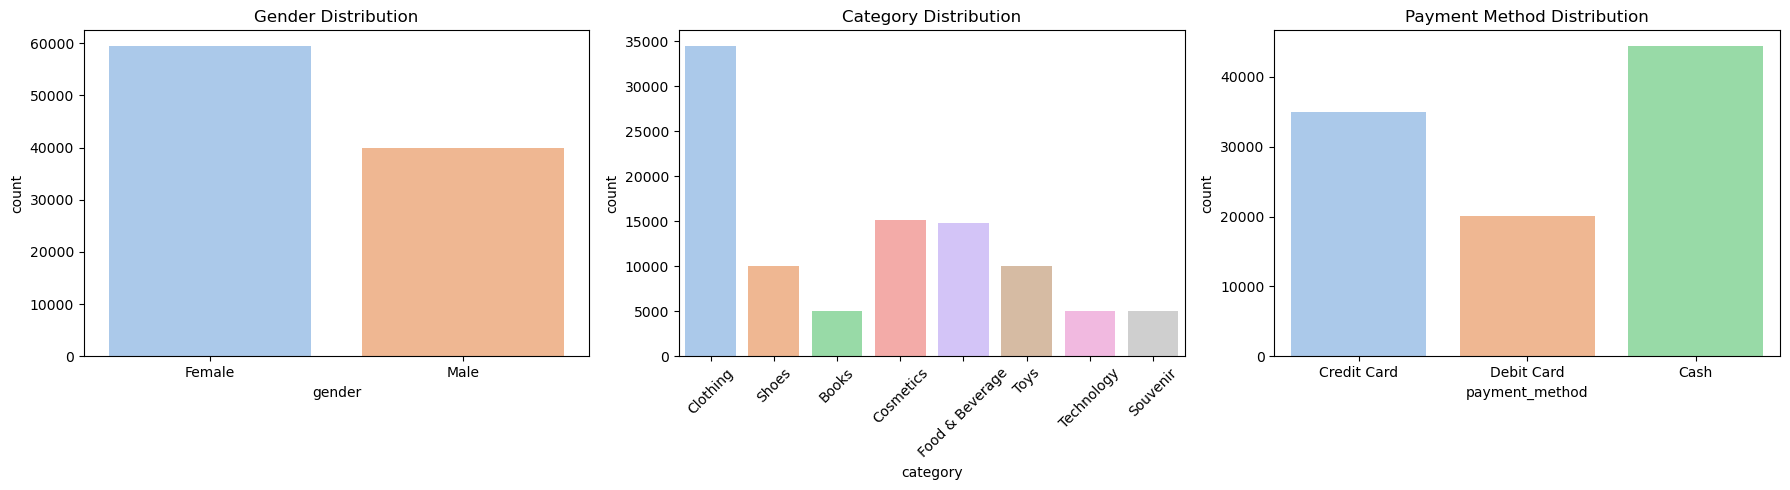

In [13]:
# Countplots for categorical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x='gender', ax=axes[0], palette="pastel")
axes[0].set_title("Gender Distribution")

sns.countplot(data=df, x='category', ax=axes[1], palette="pastel")
axes[1].set_title("Category Distribution")
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='payment_method', ax=axes[2], palette="pastel")
axes[2].set_title("Payment Method Distribution")

plt.tight_layout()
plt.show()

------------

## 2. Clean the Data

In [16]:
# Check for duplicate records
df.duplicated().sum()

0

In [30]:
# Check ranges of numerical columns
print("Age range:", df['age'].min(), "-", df['age'].max())
print("Price range:", df['price'].min(), "-", df['price'].max())
print("Quantity range:", df['quantity'].min(), "-", df['quantity'].max())

Age range: 18 - 69
Price range: 5.23 - 5250.0
Quantity range: 1 - 5


In [ ]:
The dataset already has clean ranges

### Quick check

In [41]:
(
    df.groupby(['customer_id'])
    .size()
    .reset_index(name='count')
    .query('count > 1')
)

,customer_id,count


In [43]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [45]:
df['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [47]:
df['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [49]:
df['shopping_mall'].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [53]:
# Ensure invoice_date is in datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format="%d/%m/%Y")

# Get minimum and maximum dates
print("Min date:", df['invoice_date'].min())
print("Max date:", df['invoice_date'].max())

Min date: 2021-01-01 00:00:00
Max date: 2023-03-08 00:00:00


------------

## 3. Handle Missing Data

In [57]:
# Check for missing values
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
no missing values at all in the dataset.

------------

## 4. Feature Engineering

In [68]:
# 1. Create total_spent column
df['total_spent'] = df['quantity'] * df['price']

# 2. Create binary target column
df['target'] = (df['quantity'] > 3).astype(int)

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spent,target
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,0
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,0
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,1


------------

## 5. Encode Categorical Variables

In [71]:
# 1. Label Encoding for gender
"""
Why Label Encoding?
  - gender has only two categories (Male, Female).
  - Label Encoding assigns them 0 and 1 without introducing unnecessary extra columns.
"""
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to binary categorical column
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])

df[['gender', 'gender_encoded']].head()

,gender,gender_encoded
0,Female,0
1,Male,1
2,Male,1
3,Female,0
4,Female,0


In [73]:
# 2. One-Hot Encoding for multi-class features like [category, payment_method, and shopping_mall]
"""
Why One-Hot Encoding?
  - Columns like category, payment_method, and shopping_mal` have more than two categories.
  - Label Encoding here would imply an ordinal relationship (e.g., "Electronics" < "Clothing"), which does not make sense.
  - One-Hot Encoding creates separate binary columns (dummy variables) for each category.
  - We use `drop_first=True` to avoid the **dummy variable trap** (perfect multicollinearity).  

"""
df = pd.get_dummies(df, columns=['category', 'payment_method', 'shopping_mall'], drop_first=True)

df.head()

,invoice_no,customer_id,gender,age,quantity,price,invoice_date,total_spent,target,gender_encoded,...,payment_method_Debit Card,shopping_mall_Emaar Square Mall,shopping_mall_Forum Istanbul,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center
0,I138884,C241288,Female,28,5,1500.40,2022-08-05,7502.00,1,0,...,False,False,False,False,True,False,False,False,False,False
1,I317333,C111565,Male,21,3,1800.51,2021-12-12,5401.53,0,1,...,True,False,True,False,False,False,False,False,False,False
2,I127801,C266599,Male,20,1,300.08,2021-11-09,300.08,0,1,...,False,False,False,False,False,False,True,False,False,False
3,I173702,C988172,Female,66,5,3000.85,2021-05-16,15004.25,1,0,...,False,False,False,False,False,False,False,True,False,False
4,I337046,C189076,Female,53,4,60.60,2021-10-24,242.40,1,0,...,False,False,False,False,True,False,False,False,False,False


------------

## 6. Detect & Handle Outliers

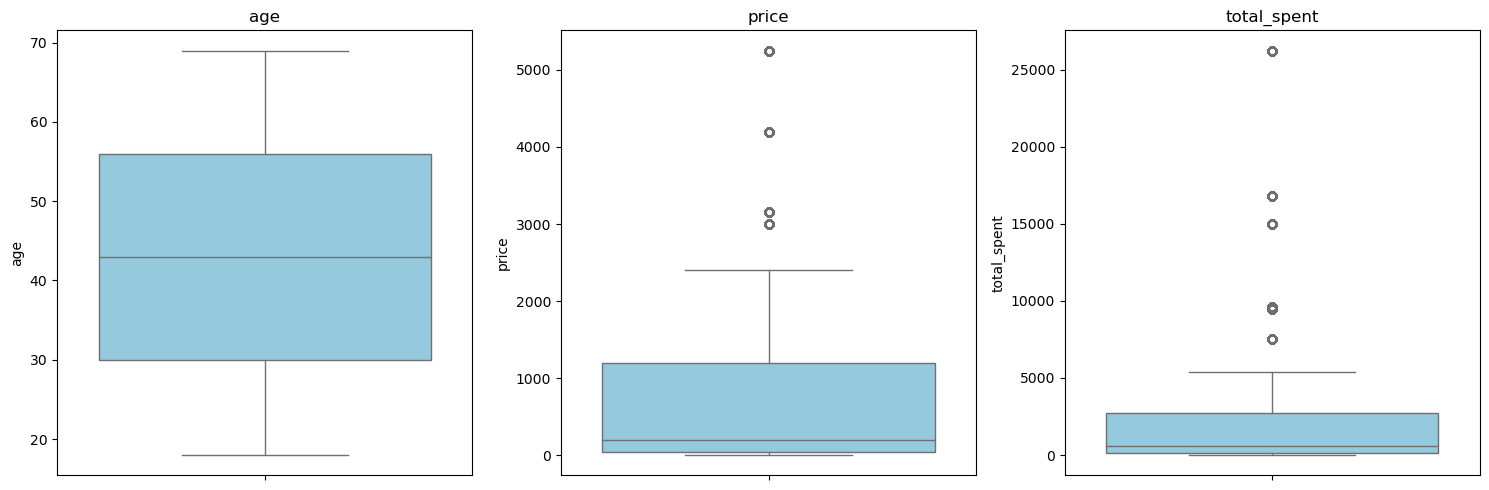

In [82]:
# Boxplots
num_cols = ['age', 'price', 'total_spent']

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [101]:
# IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (df[column] < lower) | (df[column] > upper)
    outliers = df[mask]

    df[column] = df[column].clip(lower, upper) # Assigns values outside boundary to boundary values
    return outliers, lower, upper

# Example for price
outliers_price, lower_p, upper_p = detect_outliers_iqr(df, 'price')
print("Price outliers:", outliers_price.shape[0], "values")
print("Bounds:", lower_p, ":", upper_p)

Price outliers: 0 values
Bounds: -1686.8549999999998 : 2932.625
